# FDTD Meep

[Meep](https://meep.readthedocs.io/en/latest/) is a free, open source Finite Difference Time Domain (FDTD) simulator

You to install meep and MPB with:


conda

```
conda install -c conda-forge pymeep=*=mpi_mpich_* -y
```

or mamba (faster conda)

```
mamba install pymeep=*=mpi_mpich_* -y
```

Works only on Mac, Linux or windows [WSL](https://docs.microsoft.com/en-us/windows/wsl/)



gdsfactory `gmeep` plugin computes the transmission spectrum for Photonic planar components.

One of the advantages of using `gmeep` is that you only need to define your component once using gdsfactory, and automatically can simulate it in meep without having to define the geometry again.

For extracting Sparameters, `gmeep` automatically swaps the source between ports to compute the full Sparameters matrix.

- add monitors on each component port
- extend ports to go over the PML
- run simulation and compute Sparameter coefficients with proper ratios for each Sparameter. Monitors record Fourier Transform fields. Sparameter is a relationship of those parameters at different frequencies.

The resolution is in pixels/um, you should run with at least `resolution=30` for 1/30 um/pixel (33 nm/ pixel)

Notice that most examples run with `resolution=20` so they run fast.

Here are some examples on how to extract Sparameters in Meep in some planar devices.


```bash

         top view
              ________________________________
             |                               |
             | xmargin_left                  | port_extension
             |<--------->       port_margin ||<-->
          o2_|___________          _________||_o3
             |           \        /          |
             |            \      /           |
             |             ======            |
             |            /      \           |
          o1_|___________/        \__________|_o4
             |   |                 <-------->|
             |   |ymargin_bot   xmargin_right|
             |   |                           |
             |___|___________________________|

        side view
              ________________________________
             |                     |         |
             |                     |         |
             |                   zmargin_top |
             |xmargin_left         |         |
             |<---> _____         _|___      |
             |     |     |       |     |     |
             |     |     |       |     |     |
             |     |_____|       |_____|     |
             |       |                       |
             |       |                       |
             |       |zmargin_bot            |
             |       |                       |
             |_______|_______________________|



```

## Single core

Running on a single CPU core can be slow as the a single core needs to update all the simulation grid points sequentially.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gdsfactory as gf
import gdsfactory.simulation.gmeep as gm

gf.config.set_plot_options(show_subports=False, show_ports=False)

2022-04-29 12:49:29.029 | INFO     | gdsfactory.config:<module>:52 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.3.4


2022-04-29 12:49:30.596 | INFO     | gdsfactory.simulation.gmeep:<module>:28 - Meep '1.23.0' installed at ['/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep']


Using MPI version 4.0, 1 processes


straight_fba69bc3: uid 1, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references


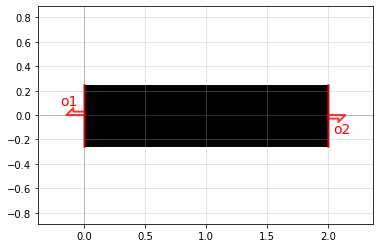

straight_fba69bc3: uid 1, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references

In [2]:
c = gf.components.straight(length=2)
c

`run=False` only plots the simulations for you to review that is set up **correctly**

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


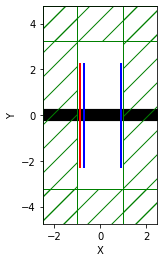

In [3]:
df = gm.write_sparameters_meep(c, run=False, ymargin_top=3, ymargin_bot=3)

In [4]:
help(gm.write_sparameters_meep)

Help on cython_function_or_method in module gdsfactory.simulation.gmeep.write_sparameters_meep:

write_sparameters_meep(component: Union[str, Callable[..., gdsfactory.component.Component], gdsfactory.component.Component, Dict[str, Any]], port_symmetries: Optional[Dict[str, Dict[str, List[str]]]] = None, resolution: int = 30, wavelength_start: float = 1.5, wavelength_stop: float = 1.6, wavelength_points: int = 50, dirpath: Union[str, pathlib.Path] = PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp'), layer_stack: gdsfactory.tech.LayerStack = LayerStack(layers={'core': LayerLevel(layer=(1, 0), thickness=0.22, zmin=0.0, material='si', sidewall_angle=0), 'clad': LayerLevel(layer=(111, 0), thickness=None, zmin=0.0, material='sio2', sidewall_angle=0), 'slab150': LayerLevel(layer=(2, 0), thickness=0.15, zmin=0.0, material='si', sidewall_angle=0), 'slab90': LayerLevel(layer=(3, 0), thickness=0.09, zmin=0.0, material='si', sidewall_angle=0), 'nitride': LayerLevel(layer=(34, 0), thic

As you've noticed we added `ymargin_top` and `ymargin_bot` to ensure we have enough distance to the PML

You can also do this directly with another version of the function that adds `ymargin_top` and `ymargin_bot`

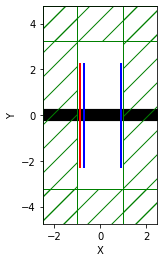

In [5]:
c = gf.components.straight(length=2)
df = gm.write_sparameters_meep(c, run=False)

Because components with `left-right` ports are very common `write_sparameters_meep` `y_margin = 3um `

taper_ea039af6: uid 9, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references


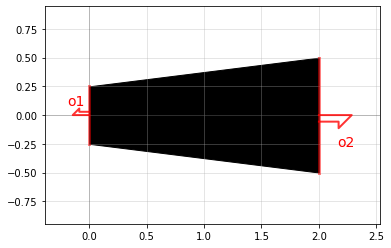

taper_ea039af6: uid 9, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references

In [6]:
c = gf.components.taper(length=2.0, width1=0.5, width2=1)
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


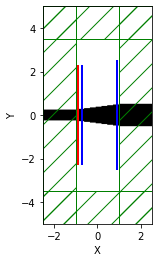

In [7]:
df = gm.write_sparameters_meep(c, run=False)

In [8]:
df = gm.write_sparameters_meep(c, resolution=20)

2022-04-29 12:49:32.030 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:342 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/taper_ea039af6_a3ad1ff5.csv')


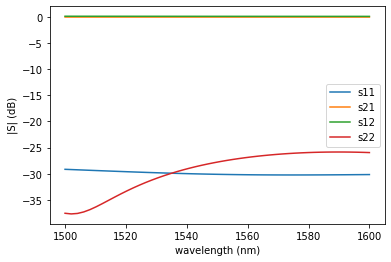

In [9]:
gf.simulation.plot.plot_sparameters(df)

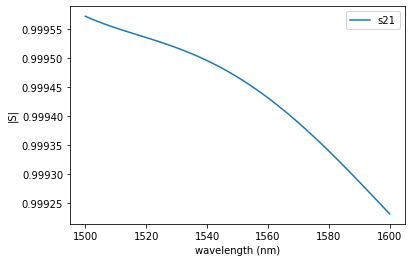

In [10]:
gf.simulation.plot.plot_sparameters(df, keys=("s21m",), logscale=False)

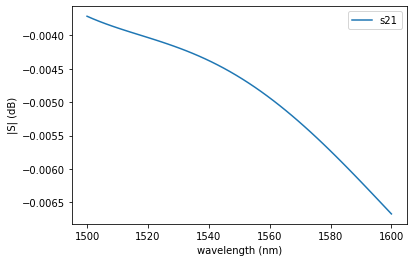

In [11]:
gf.simulation.plot.plot_sparameters(df, keys=("s21m",))

For a small taper S21 (Transmission) is around 0dB (100% transmission)

## Port symmetries

You can save some simulations in reciprocal devices.
If the device looks the same going from in -> out as out -> in, we only need to run one simulation

bend_euler_f4d868f6: uid 15, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references


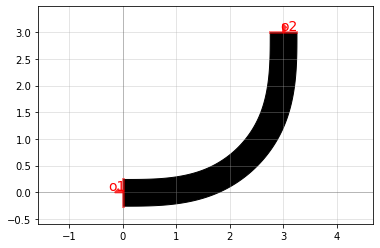

bend_euler_f4d868f6: uid 15, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references

In [12]:
c = gf.components.bend_euler(radius=3)
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


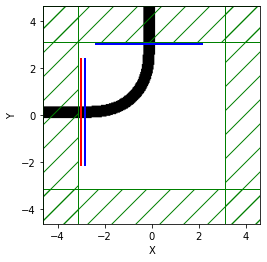

In [13]:
df = gm.write_sparameters_meep_1x1_bend90(c, run=False)

In [14]:
df = gm.write_sparameters_meep_1x1_bend90(c, run=True)

2022-04-29 12:49:34.677 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:342 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/bend_euler_f4d868f6_fa2b4cbc.csv')


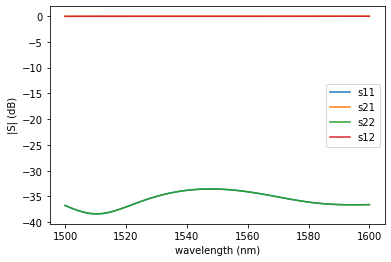

In [15]:
gf.simulation.plot.plot_sparameters(df)

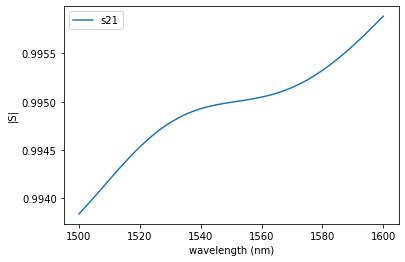

In [16]:
gf.simulation.plot.plot_sparameters(df, keys=("s21m",), logscale=False)

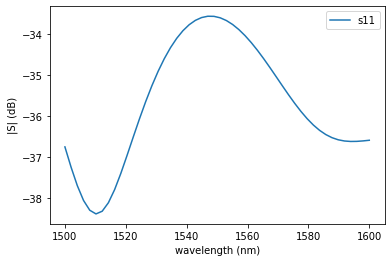

In [17]:
gf.simulation.plot.plot_sparameters(df, keys=("s11m",))

crossing: uid 22, ports ['o1', 'o3', 'o4', 'o2'], aliases [], 4 polygons, 0 references


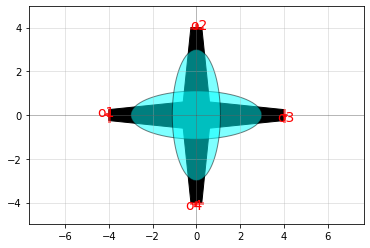

crossing: uid 22, ports ['o1', 'o3', 'o4', 'o2'], aliases [], 4 polygons, 0 references

In [18]:
c = gf.components.crossing()
c

Here are the port symmetries for a crossing

```python
port_symmetries = {
    "o1": {
        "s11": ["s22", "s33", "s44"],
        "s21": ["s12", "s34", "s43"],
        "s31": ["s13", "s24", "s42"],
        "s41": ["s14", "s23", "s32"],
    }
}
```

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


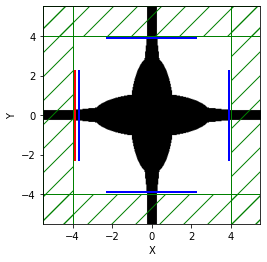

In [19]:
df = gm.write_sparameters_meep(
    c,
    resolution=20,
    ymargin=0,
    port_symmetries=gm.port_symmetries.port_symmetries_crossing,
    run=False,
)

In [20]:
df = gm.write_sparameters_meep(
    c,
    resolution=20,
    ymargin=0,
    port_symmetries=gm.port_symmetries.port_symmetries_crossing,
    run=True,
)

2022-04-29 12:49:36.384 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:342 - Simulation loaded from PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/crossing_21cd11c4.csv')


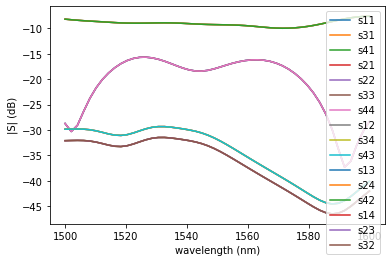

In [21]:
gm.plot.plot_sparameters(df)

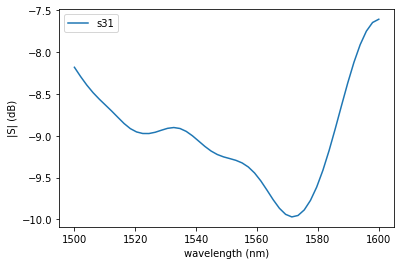

In [22]:
gm.plot.plot_sparameters(df, keys=("s31m",))

As you can see this crossing looks beautiful but is quite **lossy** (9dB @ 15550nm)

## Multicore (MPI)

You can divide each simulation into multiple cores thanks to [MPI (message passing interface)](https://en.wikipedia.org/wiki/Message_Passing_Interface)

Lets try to reproduce the coupler results from the [Meep docs](https://meep.readthedocs.io/en/latest/Python_Tutorials/GDSII_Import/)

According to the simulations in the doc to get a 3dB (50%/50%) splitter you need 150nm over 8um

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import gdsfactory as gf
import gdsfactory.simulation as sim
import gdsfactory.simulation.gmeep as gm

In [24]:
help(gf.components.coupler)

Help on function coupler in module gdsfactory.components.coupler:

coupler(gap: float = 0.236, length: float = 20.0, coupler_symmetric: Union[str, Callable[..., gdsfactory.component.Component], gdsfactory.component.Component, Dict[str, Any]] = <function coupler_symmetric at 0x7ff0c0584160>, coupler_straight: Union[str, Callable[..., gdsfactory.component.Component], gdsfactory.component.Component, Dict[str, Any]] = <function coupler_straight at 0x7ff0c05b9ee0>, dy: float = 5.0, dx: float = 10.0, cross_section: Union[str, Callable[..., gdsfactory.cross_section.CrossSection], gdsfactory.cross_section.CrossSection, Dict[str, Any]] = 'strip', **kwargs) -> gdsfactory.component.Component
    Symmetric coupler.
    
    Args:
        gap: between straights
        length: of coupling region
        coupler_symmetric
        coupler_straight
        dy: port to port vertical spacing
        dx: length of bend in x direction
        cross_section: factory
        kwargs: cross_section settings
 

coupler_2e5eb039: uid 28, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 6 polygons, 0 references


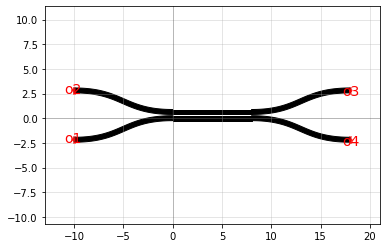

coupler_2e5eb039: uid 28, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 6 polygons, 0 references

In [25]:
c = gf.components.coupler(length=8, gap=0.13)
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


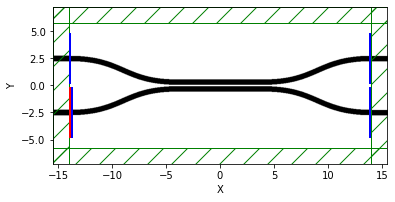

In [26]:
gm.write_sparameters_meep(component=c, run=False)

In [27]:
filepath = gm.write_sparameters_meep_mpi(
    component=c,
    cores=4,
    resolution=30,
)

2022-04-29 12:49:41.824 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_mpi:write_sparameters_meep_mpi:137 - Simulation PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/coupler_2e5eb039_a8420033.csv') already exists


In [28]:
df = pd.read_csv(filepath)

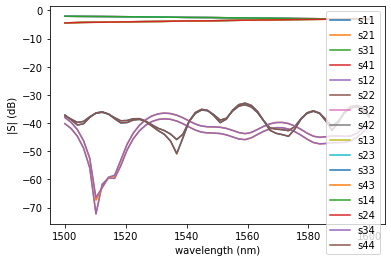

In [29]:
gf.simulation.plot.plot_sparameters(df)

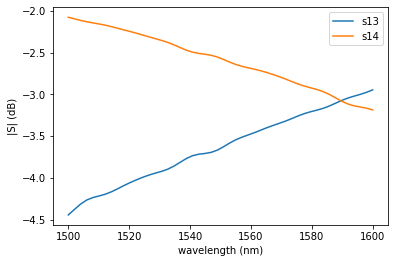

In [30]:
gf.simulation.plot.plot_sparameters(df, keys=["s13m", "s14m"])

## Batch

You can also run a batch of multicore simulations

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gdsfactory as gf

import gdsfactory.simulation as sim
import gdsfactory.simulation.gmeep as gm

In [32]:
c = gf.components.straight(length=3.1)

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


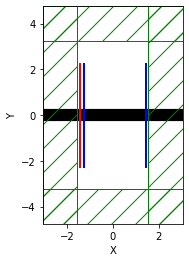

In [33]:
gm.write_sparameters_meep(c, ymargin=3, run=False)

In [34]:
c1_dict = {"component": c, "ymargin": 3}
jobs = [
    c1_dict,
]

filepaths = gm.write_sparameters_meep_batch_1x1(
    jobs=jobs,
    cores_per_run=4,
    total_cores=8,
    lazy_parallelism=True,
)

2022-04-29 12:49:43.141 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:135 - Simulation PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_a2076d5c_917ac739.csv') not found. Adding it to the queue


2022-04-29 12:49:43.143 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:143 - Running 1 simulations


2022-04-29 12:49:43.145 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:144 - total_cores = 8 with cores_per_run = 4


2022-04-29 12:49:43.146 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:145 - Running 1 batches with up to 2 jobs each.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-04-29 12:49:43.156 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:156 - Task 0 of batch 0 is job 0


2022-04-29 12:49:43.159 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_mpi:write_sparameters_meep_mpi:137 - Simulation PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/straight_a2076d5c_8932643f.csv') already exists


100%|██████████| 1/1 [00:00<00:00, 212.18it/s]

{'component': straight_a2076d5c: uid 38, ports ['o1', 'o2'], aliases [], 1 polygons, 0 references,
 'ymargin': 3}


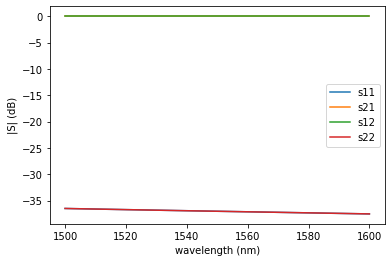

In [35]:
df = pd.read_csv(filepaths[0])
gf.simulation.plot.plot_sparameters(df)

coupler_ring: uid 43, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 0 polygons, 3 references


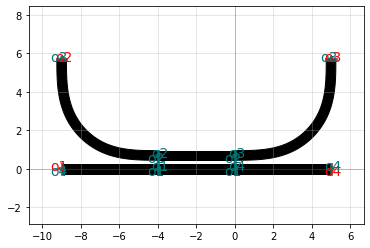

coupler_ring: uid 43, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 0 polygons, 3 references

In [36]:
c = gf.components.coupler_ring()
c

/usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/meep/__init__.py:4472: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


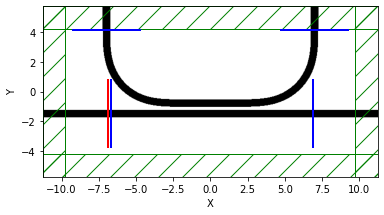

In [37]:
p = 2.5
gm.write_sparameters_meep(c, ymargin=0, ymargin_bot=p, xmargin=p, run=False)

In [38]:
c1_dict = dict(
    component=c,
    ymargin=0,
    ymargin_bot=p,
    xmargin=p,
)
jobs = [c1_dict]

filepaths = gm.write_sparameters_meep_batch(
    jobs=jobs,
    cores_per_run=4,
    total_cores=8,
    delete_temp_files=False,
    lazy_parallelism=True,
)

2022-04-29 12:49:50.908 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:135 - Simulation PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/coupler_ring_fcffc8af.csv') not found. Adding it to the queue


2022-04-29 12:49:50.909 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:143 - Running 1 simulations


2022-04-29 12:49:50.910 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:144 - total_cores = 8 with cores_per_run = 4


2022-04-29 12:49:50.911 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:145 - Running 1 batches with up to 2 jobs each.


  0%|          | 0/1 [00:00<?, ?it/s]

2022-04-29 12:49:50.913 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_batch:write_sparameters_meep_batch:156 - Task 0 of batch 0 is job 0


2022-04-29 12:49:50.914 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep_mpi:write_sparameters_meep_mpi:137 - Simulation PosixPath('/home/runner/work/gdsfactory/gdsfactory/gdslib/sp/coupler_ring_02b0f310.csv') already exists


100%|██████████| 1/1 [00:00<00:00, 385.40it/s]

{'component': coupler_ring: uid 43, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 0 polygons, 3 references,
 'xmargin': 2.5,
 'ymargin': 0,
 'ymargin_bot': 2.5}


In [39]:
df = pd.read_csv(filepaths[0])

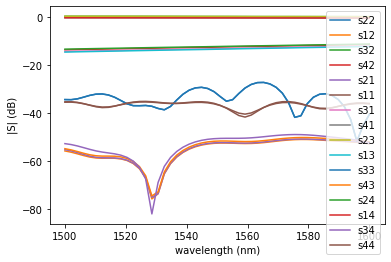

In [40]:
gm.plot.plot_sparameters(df)

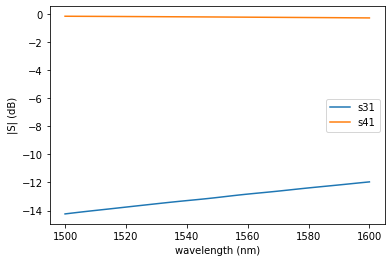

In [41]:
gm.plot.plot_sparameters(df, keys=["s31m", "s41m"])

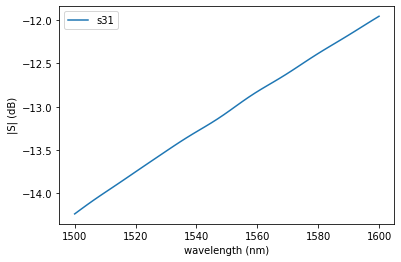

In [42]:
gm.plot.plot_sparameters(df, keys=["s31m"])

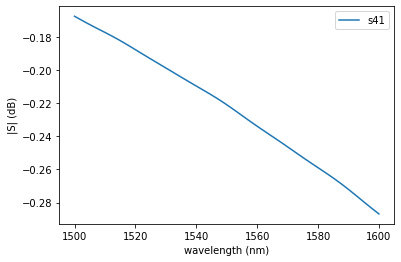

In [43]:
gm.plot.plot_sparameters(df, keys=["s41m"])